In [95]:

#import libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')


In [9]:
#load datasets
df1 = xr.open_dataset('aqua.nc')

aqua = df1['AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean']




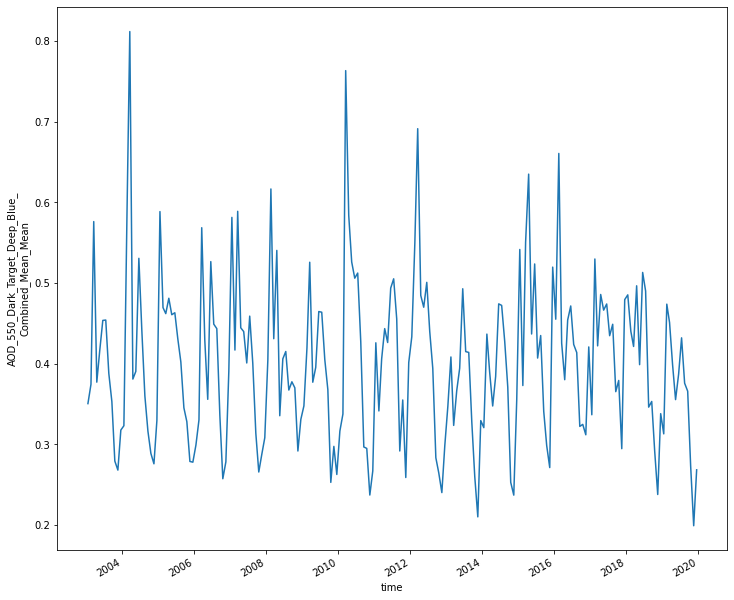

In [10]:
#selecting area of interest, West Africa
fig = plt.figure(figsize=(12,10))
West_Africa = aqua.sel(time=slice('2003-01','2019-12')).sel(lon=np.arange(-25,20,0.5),lat=np.arange(0, 25, 0.5),method= 'nearest').mean(dim=('lon', 'lat'))
West_Africa.plot()


In [13]:
#converting to pandas frame
WestAfrica = West_Africa.to_dataframe()

#resetting the index
#y = WestAfrica.reset_index()
#y.columns = ['Date','AOD']

In [18]:
WestAfrica.describe()

,AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean
count,204.000000
mean,0.401739
std,0.100663
min,0.198938
25%,0.329009
50%,0.399722
75%,0.459353
max,0.811858


In [19]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

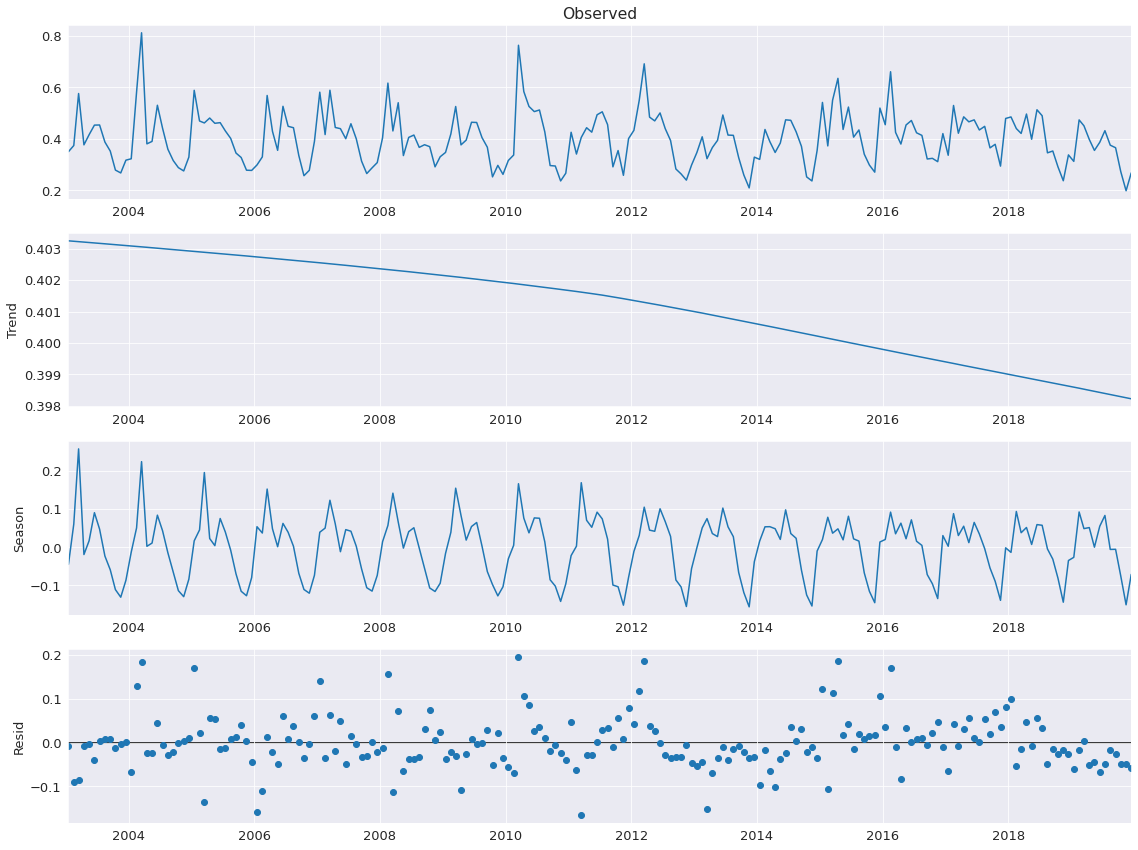

In [90]:
#decomposing trends, seasonal and residuals
tsr = STL(WestAfrica,  period =12, trend = 551)
result = tsr.fit()
fig = result.plot()

In [78]:
resi = result.resid

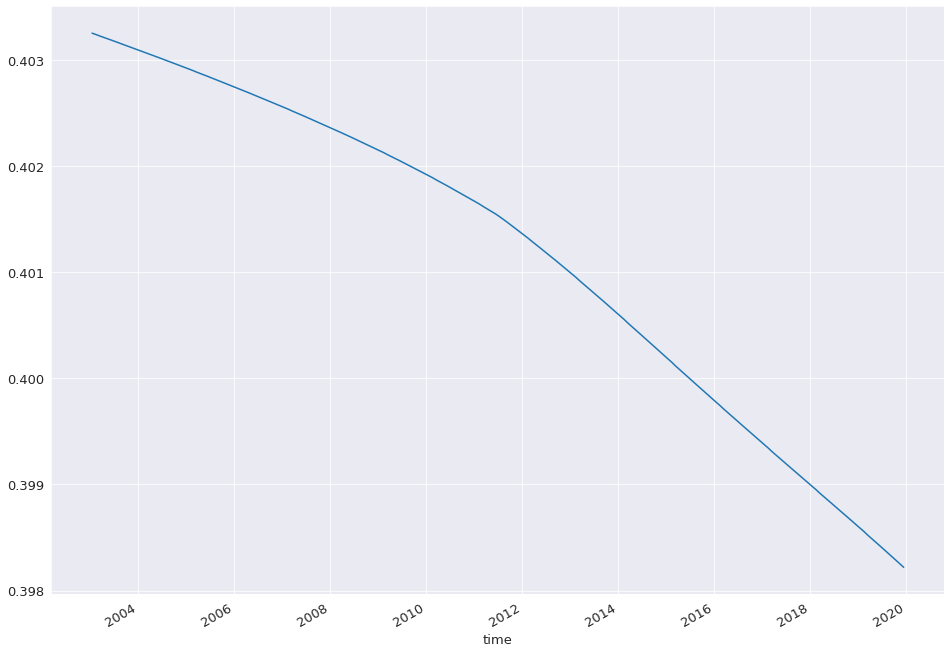

In [91]:
 tre= result.trend

tre.plot()

In [32]:
seas= result.seasonal

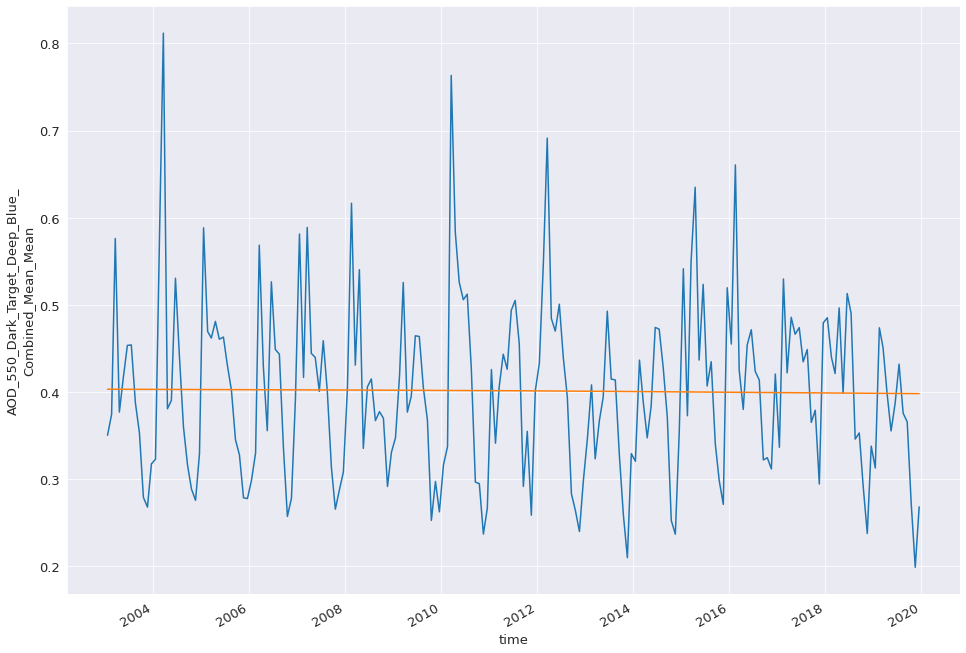

In [93]:
#plotting the main data with the trends
West_Africa.plot()
tre.plot()

In [83]:
#linear regression model  
#resetting the index of the datasets
West = WestAfrica.reset_index()
West.columns = ['Date','AOD']

#selecting the values for regression

x_t = np.array(pd.to_datetime(West['Date']).index.values,dtype = float)
y_val = np.array(West['AOD'].values, dtype = float)


#reshaping the x,y components

x = x_t.reshape(-1,1)

y = y_val.reshape(-1,1)

In [99]:
#training the datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [100]:
#linear regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_pred = model.predict(x_test)
#score model
r_q = model.score(x_test, y_pred)

In [103]:
r_q


1.0

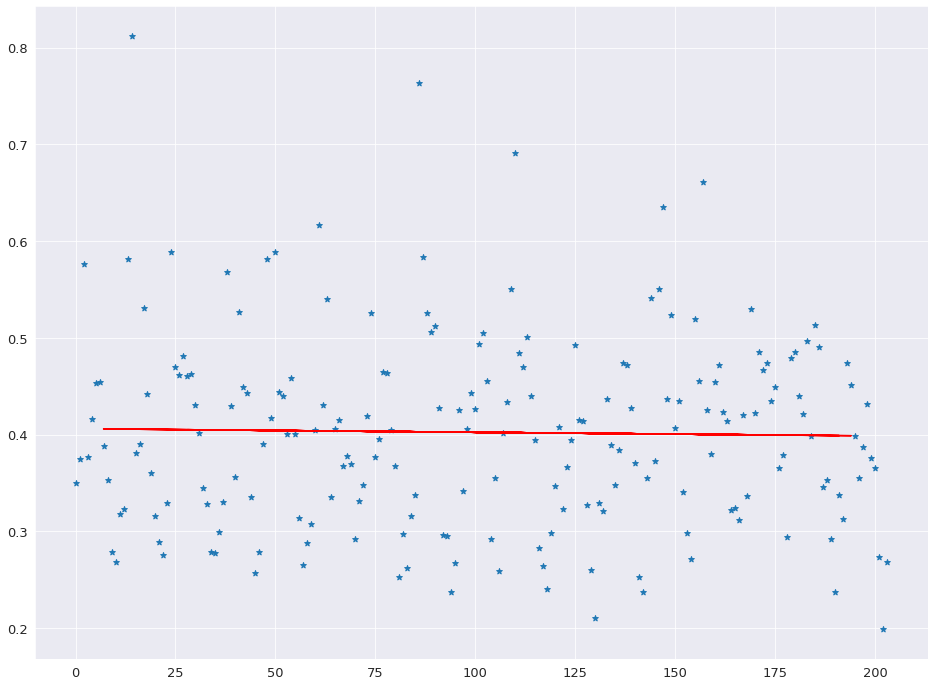

In [104]:
plt.scatter(x,y, marker = '*')
plt.plot(x_test,y_pred,color = 'red')

In [105]:
print(model.coef_)

[[-3.73760406e-05]]


In [106]:
print(model.intercept_)

[0.40614062]


In [ ]:
#equation of the line
#y = -3.7376e-05x+0.40614

In [108]:
#finding root mean squared error
msr = np.mean((y_pred-y_test)**2)
print(msr)

0.008153847421573062


12692.99167419187